<a href="https://colab.research.google.com/github/kimjh0607/Deep_Learning/blob/main/47_Pytorch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install torch
!pip3 install torchvision


In [3]:
import torch

In [4]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

x = 2*a + 3*b
y = 5*a*a + 3*b*b*b
z = 2*x + 3*y

In [5]:
z.backward()
a.grad

tensor(64.)

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

boston = pd.read_csv('./boston_house_prices.csv', header=1)
df = pd.DataFrame(boston)

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
df.rename(columns={'MEDV':'Target'}, inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [12]:
cols = ['Target', 'INDUS','RM', 'LSTAT', 'NOX', 'DIS']
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([506, 6])

In [13]:
data

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]])

In [14]:
y = data[:,:1]
x = data[:, 1:]

print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [15]:
# Define configurations

n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

In [16]:
# Define model.
model = nn.Linear(x.size(-1), y.size(-1))
model

Linear(in_features=5, out_features=1, bias=True)

In [17]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
for i in range(n_epochs):
  y_hat = model(x)
  loss = F.mse_loss(y_hat, y)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i+1) % print_interval == 0:
    print('Epoch %d : loss = %.4e' % (i+1, loss))

Epoch 100 : loss = 4.9050e+01
Epoch 200 : loss = 4.0214e+01
Epoch 300 : loss = 3.5312e+01
Epoch 400 : loss = 3.2549e+01
Epoch 500 : loss = 3.0991e+01
Epoch 600 : loss = 3.0113e+01
Epoch 700 : loss = 2.9618e+01
Epoch 800 : loss = 2.9339e+01
Epoch 900 : loss = 2.9181e+01
Epoch 1000 : loss = 2.9092e+01
Epoch 1100 : loss = 2.9041e+01
Epoch 1200 : loss = 2.9012e+01
Epoch 1300 : loss = 2.8996e+01
Epoch 1400 : loss = 2.8986e+01
Epoch 1500 : loss = 2.8981e+01
Epoch 1600 : loss = 2.8977e+01
Epoch 1700 : loss = 2.8975e+01
Epoch 1800 : loss = 2.8973e+01
Epoch 1900 : loss = 2.8972e+01
Epoch 2000 : loss = 2.8971e+01


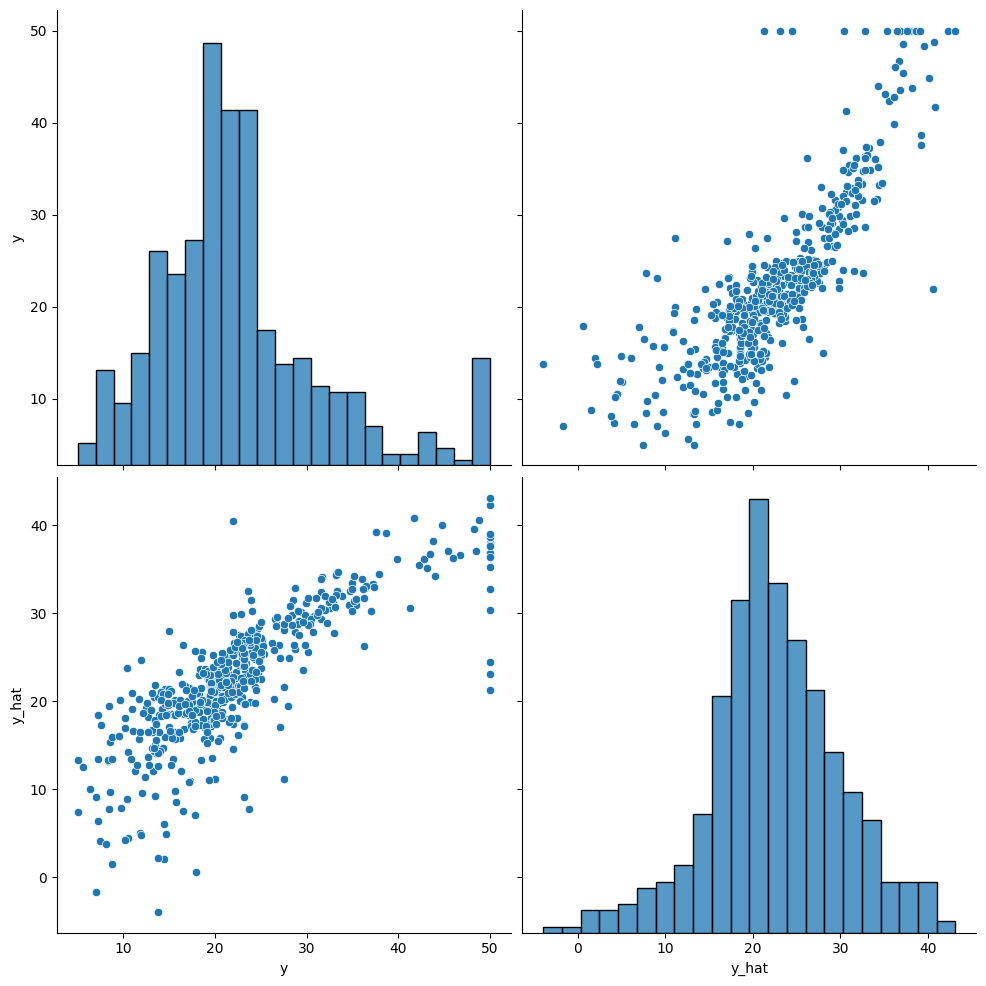

In [19]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=['y', 'y_hat'])
sns.pairplot(df, height=5)
plt.show()

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [21]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [22]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

In [23]:
cols = [
    'mean radius', 'mean texture',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'worst radius', 'worst texture', 'worst smoothness',
    'worst compactness', 'worst concave points',
    'class'
]

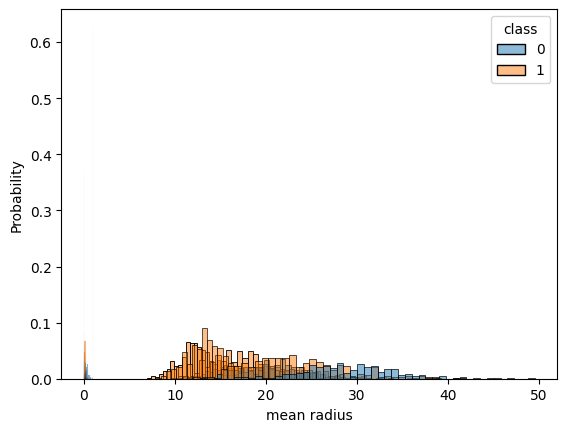

In [26]:
from sys import maxsize
for c in cols:
  sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
  plt.show

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [28]:
data = torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([569, 11])

In [29]:
x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [30]:
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [32]:
class MyModel(nn.Module):

  def __init__(self, input_dim, output_dim):
    self.input_dim = input_dim
    self.output_dim = output_dim

    super().__init__()

    self.linear = nn.Linear(input_dim, output_dim)
    self.act = nn.Sigmoid()

  def forward(self, x):

    y = self.act(self.linear(x))

    return y

In [33]:
model = MyModel(input_dim = x.size(-1),
                output_dim=y.size(-1))
crit = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [34]:
for i in range(n_epochs):
  y_hat = model(x)
  loss = crit(y_hat, y)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i+1) % print_interval == 0:
    print('Epoch %d : loss=%.4e' % (i + 1, loss))

Epoch 10000 : loss=2.7723e-01
Epoch 20000 : loss=2.2603e-01
Epoch 30000 : loss=1.9604e-01
Epoch 40000 : loss=1.7670e-01
Epoch 50000 : loss=1.6329e-01
Epoch 60000 : loss=1.5346e-01
Epoch 70000 : loss=1.4594e-01
Epoch 80000 : loss=1.4000e-01
Epoch 90000 : loss=1.3518e-01
Epoch 100000 : loss=1.3119e-01
Epoch 110000 : loss=1.2782e-01
Epoch 120000 : loss=1.2493e-01
Epoch 130000 : loss=1.2244e-01
Epoch 140000 : loss=1.2025e-01
Epoch 150000 : loss=1.1831e-01
Epoch 160000 : loss=1.1659e-01
Epoch 170000 : loss=1.1505e-01
Epoch 180000 : loss=1.1365e-01
Epoch 190000 : loss=1.1238e-01
Epoch 200000 : loss=1.1123e-01


In [35]:
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy : %.4f' % (correct_cnt / total_cnt))

Accuracy : 0.9649


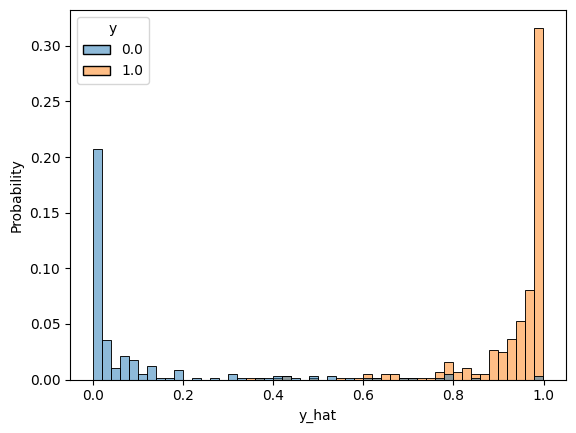

In [36]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),columns=['y', 'y_hat'])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()